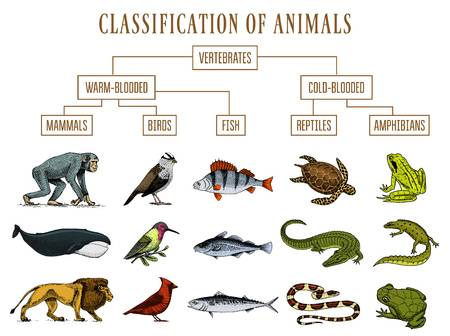

#  1. Import Python Packages 

Pandas provides us with some powerful objects like DataFrames and Series which are very useful for working with and analyzing data whereas numpy library provides objects for multi-dimensional arrays. 
Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
StandardScaler standardizes the features by removing the mean and scaling to unit variance.
Seaborn is a data visualization library in Python based on matplotlib.

In [1]:
import pandas as pd
import numpy as np  
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# 2. Import Dataset

This dataset consists of 101 animals from a zoo.
The dataset consists of 18 columns out of which 17 variables explain the various traits to describe the animals.
The "typeNumeric" column consists of the "Class" encoded from 1 - 7.                                                     The various Class Types are: Mammals, Aves, Reptiles, Pisces, Amphibians, Insects and Arthropods.

The purpose for this dataset is to be able to predict the class of the animals, based upon the variables.


In [2]:
Zoo_Data= pd.read_csv("C:\\Users\\Roma\\Downloads\\zoo.csv")
Zoo_Data.head()

,Animal_name,Hair,Feathers,Eggs,Milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,typeNumeric
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


To bring more clarity to the classification, conversion of the nominal data points to categorical was important in the "typeNumeric" column.

In [3]:
Zoo_Data['typeNumeric'].replace({1:'Mammals',2:'Aves',3:'Reptiles',4:'Pisces',5:'Amphibians',6:'Insects',7:'Arthropods'},inplace=True)


# 3. Access Data Quality and missing values

In [4]:
### No. of rows and columns

Zoo_Data.shape

(101, 18)

In [5]:
### Counts the no. of elements

Zoo_Data.size

1818

In [6]:
### Names of the Variables

print(Zoo_Data.columns.values)

['Animal_name' 'Hair' 'Feathers' 'Eggs' 'Milk' 'airborne' 'aquatic'
 'predator' 'toothed' 'backbone' 'breathes' 'venomous' 'fins' 'legs'
 'tail' 'domestic' 'catsize' 'typeNumeric']


In [7]:
### Summary of the dataframe

Zoo_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Animal_name  101 non-null    object
 1   Hair         101 non-null    int64 
 2   Feathers     101 non-null    int64 
 3   Eggs         101 non-null    int64 
 4   Milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  typeNumeric  101 non-null    object
dtypes: int64(16), object(2)
memory usage: 14.3+ KB


In [8]:
### Data type of each column

Zoo_Data.dtypes

Animal_name    object
Hair            int64
Feathers        int64
Eggs            int64
Milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
typeNumeric    object
dtype: object

In [9]:
### Checking for missing values in the dataset

Zoo_Data_null = Zoo_Data.isnull().sum()
Zoo_Data_null

Animal_name    0
Hair           0
Feathers       0
Eggs           0
Milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
typeNumeric    0
dtype: int64

In [10]:
### Descriptive Statistics

Zoo_Data.describe()

,Hair,Feathers,Eggs,Milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000


In [11]:
print(Zoo_Data.typeNumeric.unique())

['Mammals' 'Pisces' 'Aves' 'Arthropods' 'Insects' 'Amphibians' 'Reptiles']


# 4. Exploratory Data Analysis

In [12]:
### Overview of the dataset

Zoo_Data.head()

,Animal_name,Hair,Feathers,Eggs,Milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,typeNumeric
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,Mammals
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,Mammals
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,Pisces
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,Mammals
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,Mammals


count         101
unique          7
top       Mammals
freq           41
Name: typeNumeric, dtype: object

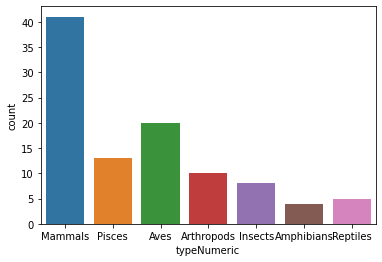

In [13]:
### Count of animals in various Classes 

sns.countplot(Zoo_Data['typeNumeric'],label="Count")
Zoo_Data.typeNumeric.describe()

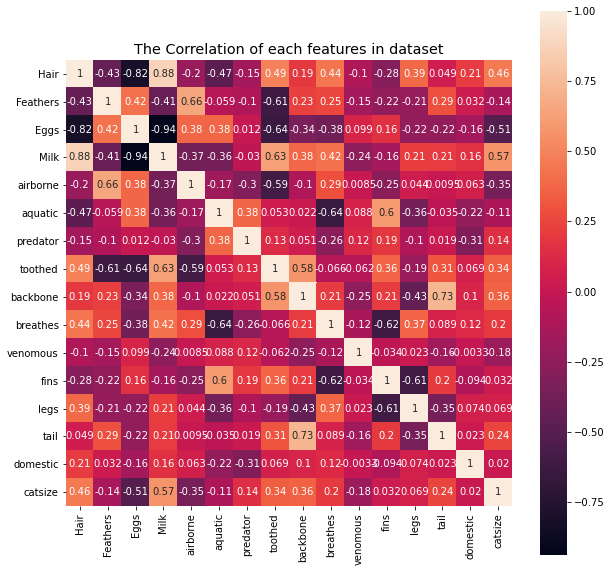

In [14]:
### Heatmap to show Correlation among the variables

correlation = Zoo_Data.corr()

### Ploting the correlation 

%matplotlib inline
plt.figure(figsize =(10,10))
sns.heatmap(data= correlation, annot =True, square= True)
plt.title('The Correlation of each features in dataset', fontsize= 'x-large')
plt.show()

In [15]:
### Considering a threshold of 0.7 

correlation[correlation != 1][abs(correlation)> 0.7].dropna(how='all', axis=1).dropna(how='all', axis=0)

,Hair,Eggs,Milk,backbone,tail
Hair,NaN,-0.817382,0.878503,NaN,NaN
Eggs,-0.817382,NaN,-0.938848,NaN,NaN
Milk,0.878503,-0.938848,NaN,NaN,NaN
backbone,NaN,NaN,NaN,NaN,0.731762
tail,NaN,NaN,NaN,0.731762,NaN


In [16]:
### Calculating the mean of each Class

Zoo_Data.groupby('typeNumeric').mean()

,Hair,Feathers,Eggs,Milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
typeNumeric,,,,,,,,,,,,,,,,
Amphibians,0.00000,0.0,1.00000,0.0,0.00000,1.000000,0.750000,1.00000,1.0,1.0,0.250000,0.000000,4.000000,0.250000,0.000000,0.000000
Arthropods,0.00000,0.0,0.90000,0.0,0.00000,0.600000,0.800000,0.00000,0.0,0.3,0.200000,0.000000,3.700000,0.100000,0.000000,0.100000
Aves,0.00000,1.0,1.00000,0.0,0.80000,0.300000,0.450000,0.00000,1.0,1.0,0.000000,0.000000,2.000000,1.000000,0.150000,0.300000
Insects,0.50000,0.0,1.00000,0.0,0.75000,0.000000,0.125000,0.00000,0.0,1.0,0.250000,0.000000,6.000000,0.000000,0.125000,0.000000
Mammals,0.95122,0.0,0.02439,1.0,0.04878,0.146341,0.536585,0.97561,1.0,1.0,0.000000,0.097561,3.365854,0.853659,0.195122,0.780488
Pisces,0.00000,0.0,1.00000,0.0,0.00000,1.000000,0.692308,1.00000,1.0,0.0,0.076923,1.000000,0.000000,1.000000,0.076923,0.307692
Reptiles,0.00000,0.0,0.80000,0.0,0.00000,0.200000,0.800000,0.80000,1.0,0.8,0.400000,0.000000,1.600000,1.000000,0.000000,0.200000


It is too obvious that if "milk" exists, then the animal is mammal; if "feathers" exists, then it should be bird.

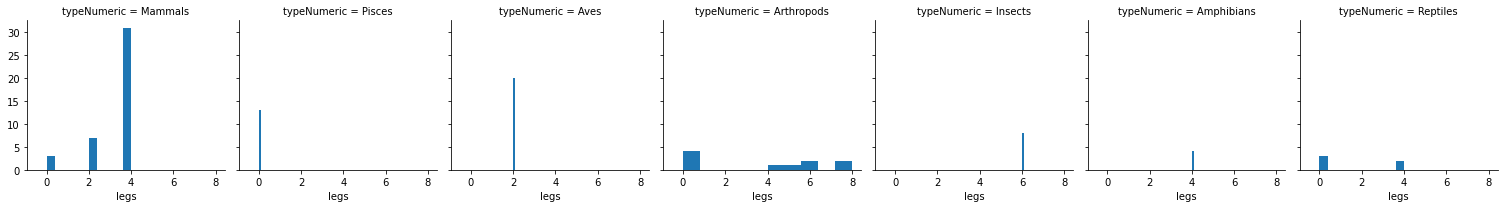

In [17]:
### Calculating the no. of legs for each Class

g = sns.FacetGrid(Zoo_Data, col="typeNumeric")
g.map(plt.hist, "legs")
plt.show()


# 5. Splitting the dataset into Train and Test

In [4]:

Zoo_Data.set_index('Animal_name',inplace=True)
Zoo_Data.head()


,Hair,Feathers,Eggs,Milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,typeNumeric
Animal_name,,,,,,,,,,,,,,,,,
aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,Mammals
antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,Mammals
bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,Pisces
bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,Mammals
boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,Mammals


In [5]:
### Splitting the dataset into 70:30 ratio

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(Zoo_Data.drop('typeNumeric',axis=1),Zoo_Data['typeNumeric'],random_state=0,test_size=0.3)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(70, 16)
(70,)
(31, 16)
(31,)


In [20]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, Y_train)
print("training accuracy :", model.score(X_train, Y_train))
print("testing accuracy :", model.score(X_test, Y_test))

training accuracy : 1.0
testing accuracy : 0.967741935483871


# 6. Algorithms : Random Forest, KNN Classifier (k-nearest neighbors), SVM (Support Vector Machine)

##  Import necessary packages

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

## i. Random Forest Classifier

The random forest algorithm is a supervised learning model which uses labeled data to “learn” how to classify unlabeled data. Random forest is a supervised learning algorithm. The "forest" it builds, is an ensemble of decision trees, usually trained with the “bagging” method. The general idea of the bagging method is that a combination of learning models increases the overall result.

In [7]:
for x in range(2,8):
    for y in [100,50,10]:
        Random_forest=RandomForestClassifier(max_depth=x,n_estimators=y)
        Random_forest.fit(X_train,Y_train)

In [8]:
y_pred=Random_forest.predict(X_test)
print("depth= ",x,' estimators= ',y,' accuracy= ',accuracy_score(Y_test,y_pred))

depth=  7  estimators=  10  accuracy=  0.967741935483871


In [9]:
#Accuracy
print('Accuracy of Random_Forest Classifier on test set: {:.2f}'.format(Random_forest.score(X_test, Y_test)))

Accuracy of Random_Forest Classifier on test set: 0.97


## ii. KNN : k-Nearest Neighbors

K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure. It represents a supervised classification algorithm that will give new data points accordingly to the k number or the closest data points.

In [10]:
for x in range(1,10):
    KNN=KNeighborsClassifier(n_neighbors=x)
    KNN.fit(X_train,Y_train)
    y_pred=KNN.predict(X_test)
    print('neighbors= ',x,' accuracy= ',accuracy_score(Y_test,y_pred))

neighbors=  1  accuracy=  0.967741935483871
neighbors=  2  accuracy=  0.9354838709677419
neighbors=  3  accuracy=  0.9354838709677419
neighbors=  4  accuracy=  0.9354838709677419
neighbors=  5  accuracy=  0.9354838709677419
neighbors=  6  accuracy=  0.9354838709677419
neighbors=  7  accuracy=  0.9032258064516129
neighbors=  8  accuracy=  0.9032258064516129
neighbors=  9  accuracy=  0.8709677419354839


In [11]:
#Accuracy
print('Accuracy of KNN Classifier on test set: {:.2f}'.format(KNN.score(X_test, Y_test)))

Accuracy of KNN Classifier on test set: 0.87


## iii. SVM : Support Vector Machine

A support vector machine (SVM) is a supervised machine learning model that uses classification algorithms for group classification problems. 

In [12]:
from sklearn.svm import SVC

SVM=SVC()
SVM.fit(X_train,Y_train)
print(f' Training Accuracy {SVM.score(X_train,Y_train)}')
f'Test Accuracy {SVM.score(X_test,Y_test)}'
#Accuracy
print('Accuracy of SVM on test set: {:.2f}'.format(SVM.score(X_test, Y_test)))

 Training Accuracy 0.9571428571428572
Accuracy of SVM on test set: 0.94


# iv. Logistic Regression

Logistic regression is a classification algorithm used to assign observations to a discrete set of classes.It is a predictive analysis algorithm and based on the concept of probability.

In [16]:
LogReg = LogisticRegression()
LogReg.fit(X_train, Y_train)
print("training accuracy :", LogReg.score(X_train, Y_train))
print('Accuracy of Logistic Regression on test set: {:.2f}'.format(LogReg.score(X_test, Y_test)))

training accuracy : 1.0
Accuracy of Logistic Regression on test set: 0.97


In [21]:
models = pd.DataFrame({
    'Model': ['Random Forest', 'KNN Classifier', 'SVM', 'Logistic Regression'],
    'Score': [Random_forest.score(X_test, Y_test), KNN.score(X_test, Y_test), SVM.score(X_test, Y_test), LogReg.score(X_test, Y_test)]})


In [22]:
models

,Model,Score
0,Random Forest,0.967742
1,KNN Classifier,0.870968
2,SVM,0.935484
3,Logistic Regression,0.967742


## Accuracy for Random Forest and Logistic Regression is the highest.

# Predicted Values for Random Forest

In [32]:
Random_forest=RandomForestClassifier(max_depth=4)
Random_forest.fit(X_train,Y_train)
y_pred=Random_forest.predict(X_test)
final_predictions = pd.DataFrame({'Name of animal':X_test.index,'Predicted Class':y_pred,'Actual Class':Y_test})

In [33]:
final_predictions

,Name of animal,Predicted Class,Actual Class
Animal_name,,,
frog,frog,Amphibians,Amphibians
stingray,stingray,Pisces,Pisces
bass,bass,Pisces,Pisces
oryx,oryx,Mammals,Mammals
sealion,sealion,Mammals,Mammals
vole,vole,Mammals,Mammals
crow,crow,Aves,Aves
seahorse,seahorse,Pisces,Pisces
opossum,opossum,Mammals,Mammals
